In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the data
data = pd.read_csv("Admission.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Column "Serial No." is of no use for EDA and Chance of Admit probability prediction hence we will drop the column

In [ ]:
#Drop Serial No. Column
data=data.drop(['Serial No.'], axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Lets see the information about the Jamboree Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
#understand the data
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000




*   There are no null values in any column
*   There are 8 columns and 500 rows

*   All the columns have datatype either 'int' or 'float'
*   Range of all the columns are different we will need scallling







In [ ]:
#check for duplicate rows
data.loc[data.duplicated()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


There are no duplicate rows in the data

In [ ]:
#double checking for null values
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
#Confirming if Research has other values than 0 and 1
data['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

We can see the column header "LOR " and "Chance of Admit " has empty space, correcting it.

In [ ]:
data.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace=True)
data['Chance of Admit']

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

We can see range of columns differ a lot for example GRE Score has max value 340 and SOP has 5 Chance of Admit has 1. We have to normalize or standardize the data later

3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR, dtype: int64


<Axes: xlabel='LOR', ylabel='count'>

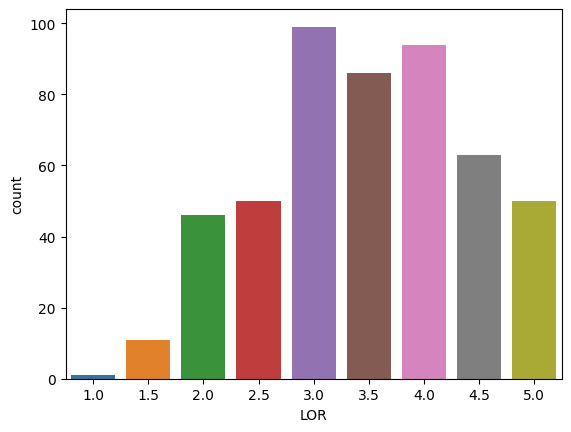

In [ ]:
print(data['LOR'].value_counts())
sns.countplot(data,x='LOR')

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64


<Axes: xlabel='SOP', ylabel='count'>

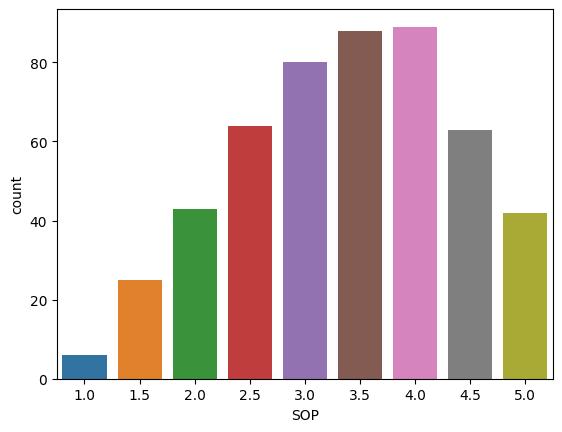

In [ ]:
print(data['SOP'].value_counts())
sns.countplot(data,x='SOP')

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64


<Axes: xlabel='University Rating', ylabel='count'>

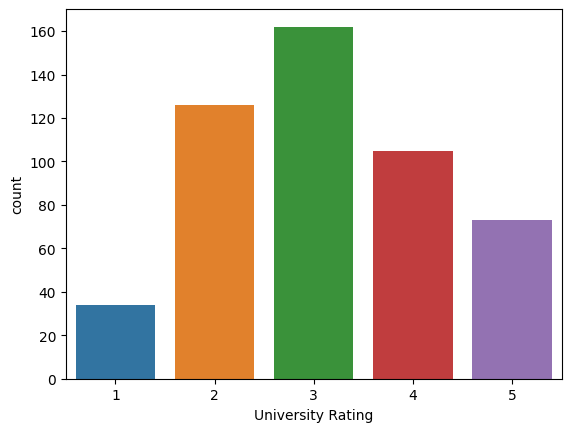

In [ ]:
print(data['University Rating'].value_counts())
sns.countplot(data,x='University Rating')

<Axes: xlabel='Chance of Admit', ylabel='CGPA'>

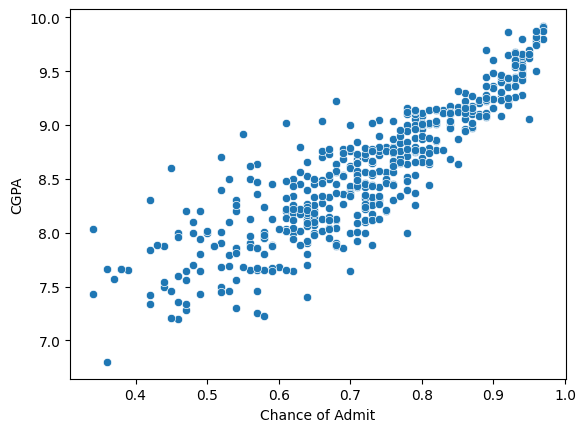

In [ ]:
sns.scatterplot(data=data, x='Chance of Admit',y='CGPA')

We can infer from this graph that high 'CGPA' can result in high 'Chance of Admit'

<Axes: xlabel='Chance of Admit', ylabel='Count'>

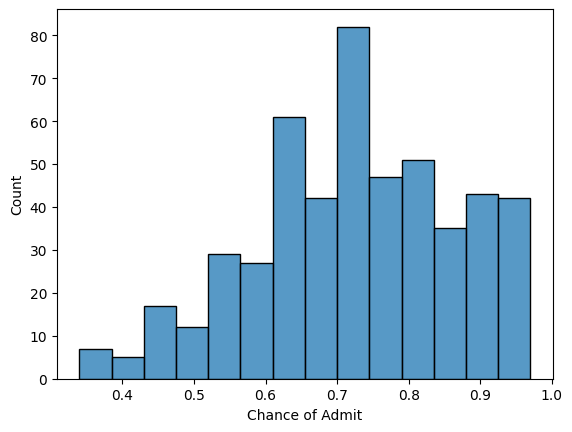

In [ ]:
#Chance of Admit and countplot
sns.histplot(data,x='Chance of Admit')

Looks like Chance of Admit is almost a bell shaped / normal distribution

Text(0.5, 1.0, 'Chance of Admit')

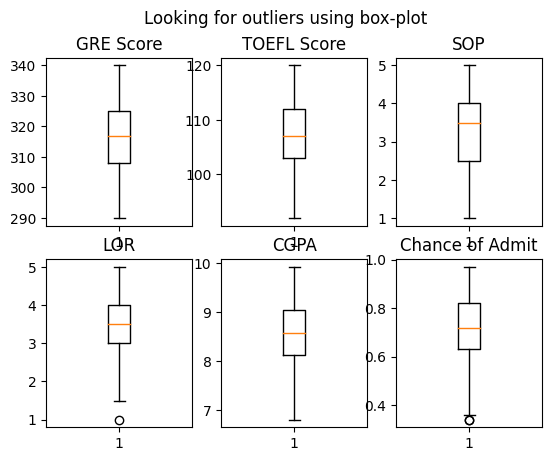

<Figure size 1000x600 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(2,3)
plt.figure(figsize=(10,6))
fig.suptitle("Looking for outliers using box-plot")
axs[0,0].boxplot(data['GRE Score'])
axs[0,0].set_title('GRE Score')
axs[0,1].boxplot(data['TOEFL Score'])
axs[0,1].set_title('TOEFL Score')
axs[0,2].boxplot(data['SOP'])
axs[0,2].set_title('SOP')
axs[1,0].boxplot(data['LOR'])
axs[1,0].set_title('LOR')
axs[1,1].boxplot(data['CGPA'])
axs[1,1].set_title('CGPA')
axs[1,2].boxplot(data['Chance of Admit'])
axs[1,2].set_title('Chance of Admit')

We can see there are not much outliers that needs to be addressed

In [ ]:
data_median_mean = data.groupby('University Rating')['GRE Score','TOEFL Score','SOP','LOR','CGPA','Research','Chance of Admit'].aggregate(['median','mean'])
data_median_mean

<ipython-input-50-d33e06de3659>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_median_mean = data.groupby('University Rating')['GRE Score','TOEFL Score','SOP','LOR','CGPA','Research','Chance of Admit'].aggregate(['median','mean'])


GRE Score             TOEFL Score                SOP  \
                     median        mean      median        mean median   
University Rating                                                        
1                     301.5  304.911765        99.0  100.205882    2.0   
2                     309.0  309.134921       104.0  103.444444    2.5   
3                     316.0  315.030864       106.0  106.314815    3.5   
4                     325.0  323.304762       111.0  110.961905    4.0   
5                     330.0  327.890411       114.0  113.438356    4.5   

                               LOR             CGPA           Research  \
                       mean median      mean median      mean   median   
University Rating                                                        
1                  1.941176   2.25  2.426471  7.740  7.798529      0.0   
2                  2.682540   3.00  2.956349  8.170  8.177778      0.0   
3                  3.308642   3.50  3.401235  8.545  8.500123      1.0   
4                  4.000000   4.00  3.947619  9.020  8.936667      1.0   
5                  4.479452   4.50  4.404110  9.300  9.278082      1.0   

                            Chance of Admit            
                       mean          median      mean  
University Rating                                      
1                  0.294118            0.57  0.562059  
2                  0.293651            0.64  0.626111  
3                  0.537037            0.72  0.702901  
4                  0.780952            0.82  0.801619  
5                  0.876712            0.91  0.888082

We can see mean and median of almost all the columns w.r.t University Rating is equal this means the data is normally distributed but for University Rating :- 1 observe the difference at few columns this because we have less data w.r.t. to University Rating = 1

Lets just consider the rows which has chance of admit > 0.8 and to analyze

In [ ]:
#normal statistical value of data with respect to chance of admit>0.8
data_where_Admit_greater = data.loc[data['Chance of Admit']>0.8]
data_where_Admit_greater.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,328.450704,113.795775,4.274648,4.302817,4.235915,9.277676,0.936620,0.889930
std,6.453959,3.698838,0.773170,0.601292,0.696225,0.300533,0.244508,0.047138
min,312.000000,104.000000,2.000000,2.000000,1.500000,8.440000,0.000000,0.810000
25%,324.000000,111.000000,4.000000,4.000000,4.000000,9.100000,1.000000,0.850000
50%,328.500000,114.000000,4.000000,4.500000,4.500000,9.230000,1.000000,0.890000
75%,333.000000,117.000000,5.000000,4.875000,5.000000,9.467500,1.000000,0.930000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


We can see there is a major difference between min value of columns from when we consider the whole dataset. And we have a decent amount of data w.r.t chance of admit more than 0.8. There is no row when University Rating is 1 and chance of admit 0.8 since less students consider and focus on these university

Try to find out max-min value of all the column grouped by "University Rating"

In [ ]:
#University Ranking max-min GRE_Score admit more than 0.8
data_where_Admit_greater_max_min = data_where_Admit_greater.groupby('University Rating')['GRE Score','TOEFL Score','SOP','LOR','CGPA','Research'].aggregate(['max','min'])
data_where_Admit_greater_max_min

<ipython-input-52-e0a15e606d93>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_where_Admit_greater_max_min = data_where_Admit_greater.groupby('University Rating')['GRE Score','TOEFL Score','SOP','LOR','CGPA','Research'].aggregate(['max','min'])


GRE Score      TOEFL Score       SOP       LOR       CGPA  \
                        max  min         max  min  max  min  max  min   max   
University Rating                                                             
2                       332  320         118  107  4.5  2.0  3.5  1.5  9.36   
3                       331  312         120  106  4.5  3.0  5.0  3.0  9.32   
4                       340  314         120  104  5.0  3.0  5.0  2.5  9.92   
5                       340  320         120  107  5.0  3.5  5.0  3.0  9.91   

                        Research      
                    min      max min  
University Rating                     
2                  8.44        1   0  
3                  8.64        1   0  
4                  8.77        1   0  
5                  8.66        1   0

We can observe the value of GRE Score, TOEFL Score, CGPA are same rather almost same for University Rating = 4 and 5, here SOP and LOR comes into action and plays an important role in getting into University with Rating - 5

In [ ]:
print(data_where_Admit_greater.loc[(data_where_Admit_greater['GRE Score']==312) & (data_where_Admit_greater['University Rating']==3)])

     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
282        312          106                  3  4.0  3.5  8.79         1   

     Chance of Admit  
282             0.81  


In [ ]:
print(data_where_Admit_greater.loc[(data_where_Admit_greater['GRE Score']==320) & (data_where_Admit_greater['University Rating']==2)])

     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
145        320          113                  2  2.0  2.5  8.64         1   

     Chance of Admit  
145             0.81  


The above two rows shows that not only GRE Score, TOEFL Score and CGPA is required you need to have good LOR and SOP to increase the Chances of Admit at high University Rating




In [ ]:
# Chance of Admit is greater than 0.8 and median and mean of different variables
data_where_Admit_greater_median_mean = data_where_Admit_greater.groupby('University Rating')['GRE Score','TOEFL Score','SOP','LOR','CGPA','Research'].aggregate(['median','mean'])
data_where_Admit_greater_median_mean

<ipython-input-55-cfdb0a295f1b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_where_Admit_greater_median_mean = data_where_Admit_greater.groupby('University Rating')['GRE Score','TOEFL Score','SOP','LOR','CGPA','Research'].aggregate(['median','mean'])


GRE Score             TOEFL Score                SOP  \
                     median        mean      median        mean median   
University Rating                                                        
2                     325.0  325.500000       111.5  112.000000    3.0   
3                     323.5  322.875000       110.0  111.687500    3.5   
4                     328.0  328.355932       113.0  113.610169    4.5   
5                     331.0  330.142857       115.0  114.619048    4.5   

                               LOR             CGPA           Research  \
                       mean median      mean median      mean   median   
University Rating                                                        
2                  3.125000   2.75  2.625000  8.895  8.897500      1.0   
3                  3.656250   3.50  3.812500  9.070  9.020000      1.0   
4                  4.305085   4.50  4.186441  9.180  9.265085      1.0   
5                  4.539683   4.50  4.492063  9.360  9.379048      1.0   

                             
                       mean  
University Rating            
2                  0.750000  
3                  0.875000  
4                  0.915254  
5                  0.984127

The median and mean value are almost similar hence we can say dataset have symmetrical distribution

<Axes: xlabel='LOR', ylabel='count'>

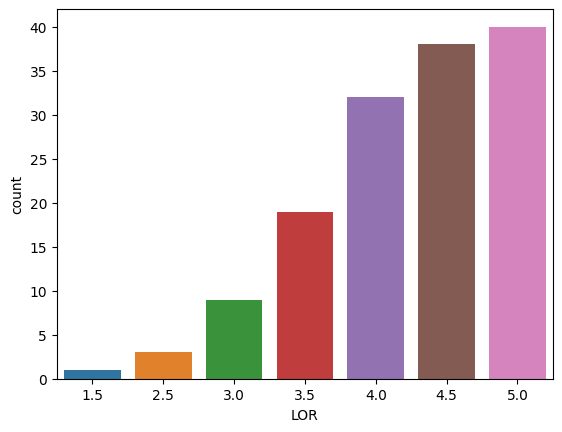

In [ ]:
sns.countplot(data_where_Admit_greater,x='LOR')

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
count = len(data.columns)
for col in data.columns[:count]:
  for col2 in data.columns[data.columns.get_loc(col)::]:
    if col!=col2:
      corr, _ = spearmanr(data[col],data[col2])
      corr1, __ = pearsonr(data[col],data[col2])
      print("Spearman and Pearson Correlation for ",col," and ",col2," :- ",corr," -- ",corr1," respectively")

Spearman and Pearson Correlation for  GRE Score  and  TOEFL Score  :-  0.8238534081232208  --  0.8272004035317205  respectively
Spearman and Pearson Correlation for  GRE Score  and  University Rating  :-  0.643422676176523  --  0.6353762113239009  respectively
Spearman and Pearson Correlation for  GRE Score  and  SOP  :-  0.6206884602107178  --  0.6134976734624102  respectively
Spearman and Pearson Correlation for  GRE Score  and  LOR  :-  0.5143515202411133  --  0.5246793925817074  respectively
Spearman and Pearson Correlation for  GRE Score  and  CGPA  :-  0.829250722579067  --  0.8258779536403553  respectively
Spearman and Pearson Correlation for  GRE Score  and  Research  :-  0.5784870561581277  --  0.5633981217777564  respectively
Spearman and Pearson Correlation for  GRE Score  and  Chance of Admit  :-  0.8222011595365538  --  0.8103506354632598  respectively
Spearman and Pearson Correlation for  TOEFL Score  and  University Rating  :-  0.6455330040314258  --  0.6497991951468047 

Very Strongly Related
*   GRE Score and TOEFL Score
*   GRE Score and CGPA
*   GRE Score and Chance of Admit (Target Variable)
*   TOEFL Score and CGPA
*   TOEFL Score and Chance of Admit (Target Variable)
*   University Rating and SOP
*   University Rating and CGPA
*   University Rating and Chance of Admit
*   SOP and CGPA
*   SOP and Chance of Admit















In [ ]:
for col in data.columns[:-1]:
  corr, _ = spearmanr(data[col],data['Chance of Admit'])
  corr1, __ = pearsonr(data[col],data['Chance of Admit'])
  print("Spearman and Pearson Correlation for ",col," and Chance of Admit :- ",corr," -- ",corr1," respectively")

Spearman and Pearson Correlation for  GRE Score  and Chance of Admit :-  0.8222011595365538  --  0.8103506354632598  respectively
Spearman and Pearson Correlation for  TOEFL Score  and Chance of Admit :-  0.7936341632036854  --  0.792227614305083  respectively
Spearman and Pearson Correlation for  University Rating  and Chance of Admit :-  0.7037424626111848  --  0.6901323687886889  respectively
Spearman and Pearson Correlation for  SOP  and Chance of Admit :-  0.7027993934494721  --  0.6841365241316724  respectively
Spearman and Pearson Correlation for  LOR  and Chance of Admit :-  0.6436271408925764  --  0.6453645135280106  respectively
Spearman and Pearson Correlation for  CGPA  and Chance of Admit :-  0.8887856599613074  --  0.8824125749045744  respectively
Spearman and Pearson Correlation for  Research  and Chance of Admit :-  0.5657154944517806  --  0.5458710294711377  respectively


We can observe
*   GRE Score
*   TOEFL Score
*   University Rating
*   CGPA
are strongly correlated to the target variable - "Chance of Admit"





In [ ]:
data['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

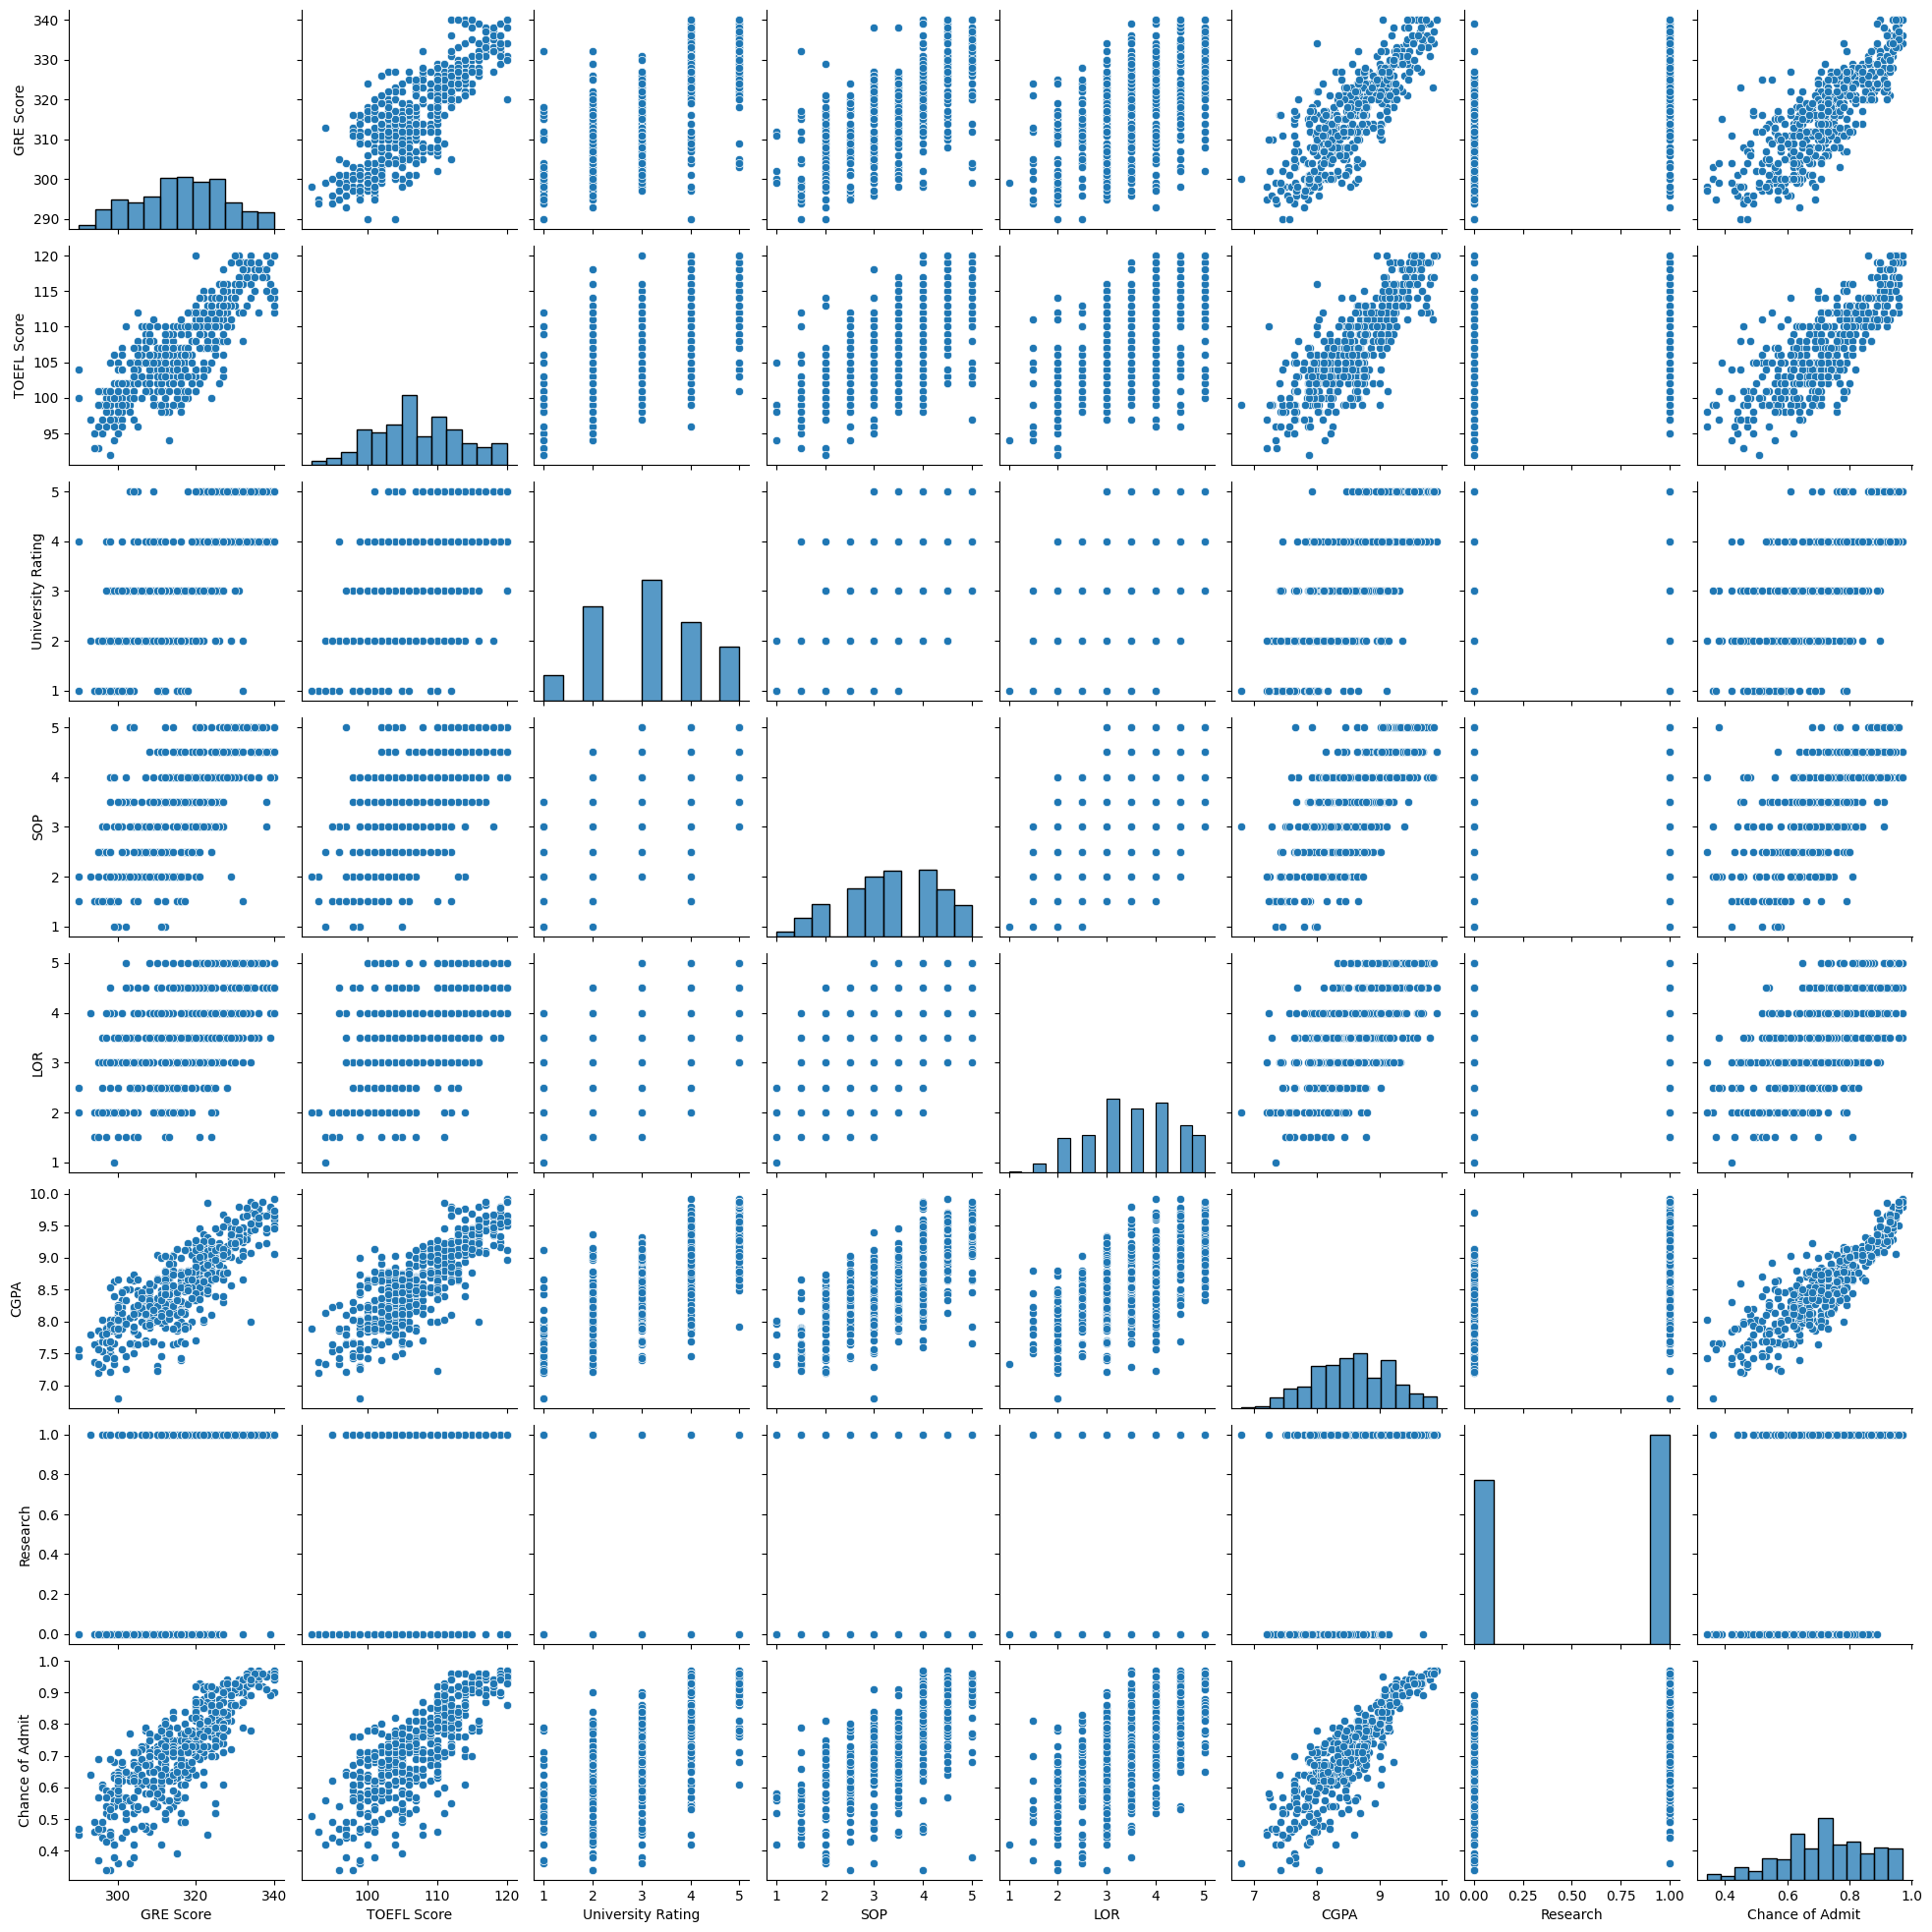

In [ ]:
sns.pairplot(data)

Since the range of all the columns vary a lot so we will normalize/scale the dataset. From the last column of graph we can infer that dependent variable are almost directly proportional to the change in the independent variables for most of the columns

In [ ]:
# normalize/scaling the dataset
def normalize (x):
  return ((x-np.min(x))/(max(x)-min(x)))

data = data.apply(normalize)

In [ ]:
X = data[['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research']]
y = data['Chance of Admit']
print(X)
print(y)

     GRE Score  TOEFL Score  University Rating    SOP    LOR      CGPA  \
0         0.94     0.928571               0.75  0.875  0.875  0.913462   
1         0.68     0.535714               0.75  0.750  0.875  0.663462   
2         0.52     0.428571               0.50  0.500  0.625  0.384615   
3         0.64     0.642857               0.50  0.625  0.375  0.599359   
4         0.48     0.392857               0.25  0.250  0.500  0.451923   
..         ...          ...                ...    ...    ...       ...   
495       0.84     0.571429               1.00  0.875  0.750  0.711538   
496       0.94     0.892857               1.00  1.000  1.000  0.983974   
497       0.80     1.000000               1.00  0.875  1.000  0.884615   
498       0.44     0.392857               0.75  0.750  1.000  0.522436   
499       0.74     0.750000               0.75  0.875  0.875  0.717949   

     Research  
0         1.0  
1         1.0  
2         1.0  
3         1.0  
4         0.0  
..        ...  

In [ ]:
# We can perform scalling just on feature or whole dataset won't matter a lot
# X = X.apply(normalize)
# X.head()

Dividing the data into train and test 80% and 20% respectively

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 7)
(100, 7)
(400,)
(100,)


Lets just try to predict the value using sklearn Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Print the Coefficient Values
sklearn_model.coef_

array([ 0.1214854 ,  0.13816144,  0.03165429, -0.00645596,  0.12234599,
        0.61094306,  0.04257335])

In [ ]:
#Printing the intercept value
sklearn_model.intercept_

0.001410935825620907

In [ ]:
sklearn_y_hat = sklearn_model.predict(X_test)

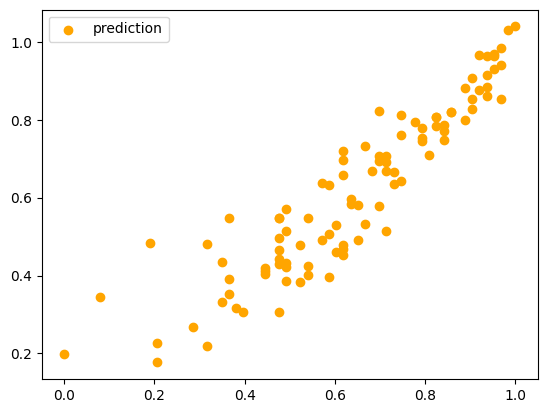

In [ ]:
fig = plt.figure()
plt.scatter(y_test,sklearn_y_hat,color='orange',label='prediction')
plt.legend()
plt.show()

We have build the model using sklearn library and it looks good through the graph now lets check its R2 score which will tell how well this regression model fits the data

In [ ]:
sklearn_model.score(X_test,y_test)

0.8305208734305328

0.83 is a good value this shows our model is a goot fit now lets just involve the whole dataset instead of just X_test

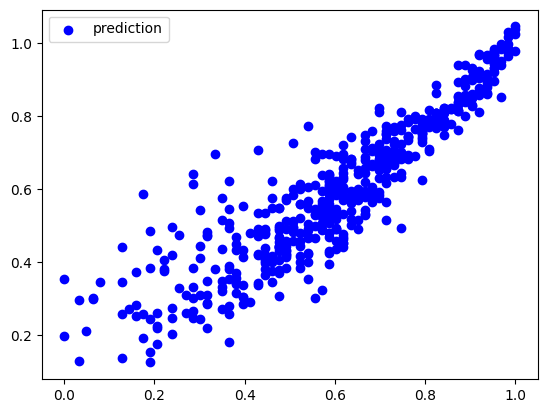

In [ ]:
sklearn_y_hat_whole = sklearn_model.predict(X)
fig = plt.figure()
plt.scatter(y,sklearn_y_hat_whole,color='blue',label='prediction')
plt.legend()
plt.show()

In [ ]:
sklearn_model.score(X,y)

0.8209954862912872

It is almost similar this means our training data was selected randomly which tried to include all the possible scenarios and regression model learnt through them and was able to fit the data well

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'GRE Score'),
  Text(1, 0, 'TOEFL Score'),
  Text(2, 0, 'University Rating'),
  Text(3, 0, 'SOP'),
  Text(4, 0, 'LOR'),
  Text(5, 0, 'CGPA'),
  Text(6, 0, 'Research')])

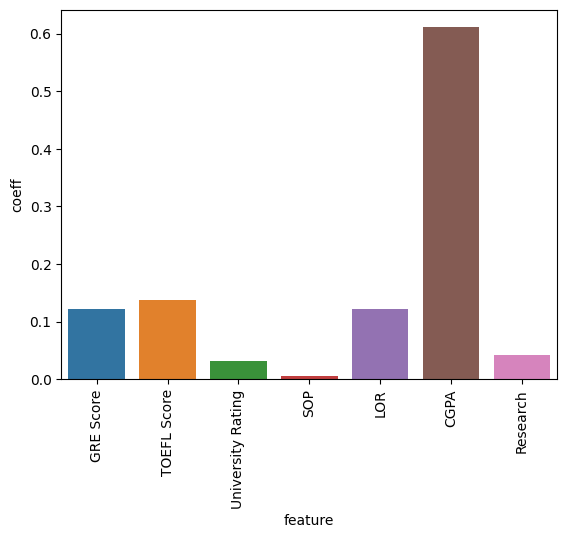

In [ ]:
imp = pd.DataFrame(list(zip(X_test.columns,np.abs(sklearn_model.coef_))),
                   columns=['feature', 'coeff'])
sns.barplot(x='feature', y='coeff', data=imp)
plt.xticks(rotation=90)

By above bar graph its is visible that column 'CGPA' has more weight hence is more important and 'SOP' has least hence least important

This is a good model but here we have not considered a lot of things so we will try to consider them and will perform Linear Regression using statsmodel library

**Assumptions of Linear Regression**
1. Assumption of Linearity
=> From the last column of pairplot graph we can confirm that there is a linear relationship betwee the independant variables and the dependent variable ("Chance of Admit")
2. Non multi-collinear features
=> We will take care of this using VIF( Variance Inflation Factor)
3. Errors are normally distributed
=> We will find the error and draw histogram of it. Then will confirm the normal distribution using Shapiro-Wilk test and qq-plot
4. Heteroskedasticity should not exist
=> We will check for that by plotting dependent varaible and errors

In [ ]:
import statsmodels.api as sm

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2, random_state=100)

In [ ]:
# By default statmodel doesn't take intercept, to add intercept we will add a constant

X_sm_train = sm.add_constant(X_train)
X_sm_train

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
205,1.0,0.10,0.250000,0.25,0.375,0.500,0.272436,0.0
404,1.0,0.42,0.321429,0.50,0.250,0.375,0.269231,1.0
337,1.0,0.84,0.928571,1.00,1.000,1.000,0.855769,1.0
440,1.0,0.30,0.428571,0.25,0.375,0.125,0.317308,0.0
55,1.0,0.60,0.392857,0.50,0.500,0.500,0.288462,0.0
...,...,...,...,...,...,...,...,...
343,1.0,0.30,0.392857,0.25,0.375,0.625,0.426282,0.0
359,1.0,0.62,0.535714,0.25,0.250,0.125,0.525641,0.0
323,1.0,0.30,0.357143,0.25,0.250,0.375,0.442308,0.0
280,1.0,0.42,0.357143,0.50,0.875,0.750,0.589744,1.0


In [ ]:
model = sm.OLS(y_train, X_sm_train)
model_result = model.fit()
model_result

See a const column is added for W0 value of the linear equation

In [ ]:
print(model_result.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     250.3
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          2.27e-140
Time:                        17:14:21   Log-Likelihood:                 371.47
No. Observations:                 400   AIC:                            -726.9
Df Residuals:                     392   BIC:                            -695.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0014      0.01

According to the summary we can see the P value (chance that variable has no affect on dependent variable) of SOP and University Rate are more than 5% i.e. 0.05 hence they are not that significant from the above sklearn regression model also we found SOP has the least weight.

The R-squared value is almost equal to Adj. R-squared that means mulicollineartiy is less there are very less or no columns which is poorly contributing

"const" is the intercept which we have added

In [ ]:
#multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
X_mulcol = X_train
vif['Features'] = X_mulcol.columns
vif['VIF'] = [variance_inflation_factor(X_mulcol,i) for i in range(X_mulcol.shape[1])]
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
5,CGPA,41.710104
0,GRE Score,29.687602
1,TOEFL Score,27.397405
3,SOP,18.768713
4,LOR,15.062201
2,University Rating,10.641645
6,Research,3.278831


We see the VIF value of CGPA is highest we can remove it. The reason for collinearty could be if a gradute is well in studies he/she must have recieved good CGPA and if he/she is good in studies that means mostly will score good in GRE Score and TOEFL Score as well as other most likely is related to other columns

In [ ]:
#Removing CGPA and again trying to get model summary and VIF value

cols = vif['Features'][1:].values
X2_mulcol = X_train[cols]  #removed CGPA

X2_sm_mulcol = sm.add_constant(X2_mulcol)
model_result2 = sm.OLS(y_train, X2_sm_mulcol).fit()
print(model_result2.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     208.4
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          9.44e-119
Time:                        17:14:21   Log-Likelihood:                 317.73
No. Observations:                 400   AIC:                            -621.5
Df Residuals:                     393   BIC:                            -593.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0649      0.01

In [ ]:
vif2 = pd.DataFrame()
vif2['Features'] = X2_mulcol.columns
vif2['VIF'] = [variance_inflation_factor(X2_mulcol,i) for i in range(X2_mulcol.shape[1])]
vif2 = vif2.sort_values(by="VIF", ascending = False)
vif2

,Features,VIF
1,TOEFL Score,24.920084
0,GRE Score,23.803172
2,SOP,17.651713
3,LOR,13.146888
4,University Rating,10.595609
5,Research,3.247929


TOEFL Score also has a very high VIF values so we should remove it as well

In [ ]:
cols2 = vif2['Features'][1:].values
X3_mulcol = X_train[cols2]  #removed CGPA

X2_sm_mulcol = sm.add_constant(X2_mulcol)
model_result3 = sm.OLS(y_train, X3_mulcol).fit()
print(model_result3.summary())

                                 OLS Regression Results                                
Dep. Variable:        Chance of Admit   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              2295.
Date:                Wed, 20 Dec 2023   Prob (F-statistic):                   2.57e-289
Time:                        17:14:21   Log-Likelihood:                          293.23
No. Observations:                 400   AIC:                                     -576.5
Df Residuals:                     395   BIC:                                     -556.5
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

We have recieved a very good R-squared :- 0.967 and Adj. R-squared :- 0.966 which is great

In [ ]:
vif3 = pd.DataFrame()
vif3['Features'] = X3_mulcol.columns
vif3['VIF'] = [variance_inflation_factor(X3_mulcol,i) for i in range(X3_mulcol.shape[1])]
vif3 = vif3.sort_values(by="VIF", ascending = False)
vif3

,Features,VIF
1,SOP,17.188871
2,LOR,12.731703
0,GRE Score,12.533473
3,University Rating,10.422819
4,Research,3.227076


We observe as soon as we remove our CGPA column out R-squared value decrease this by approximately 0.18 around 20% this means even though little multi-collinearity is there which is because he someone is good in studies max of the time they will perform well in GRE Score, TOEFL Score, etc but this is not the case always and someone might have low CGPA but can perform really well in GRE Score, TOEFL Score etc areas

Hence, I don't think we should be removing the CGPA column.

In [ ]:
y_hat = model_result3.predict(X3_mulcol)
errors = y_hat - y_train

Text(0.5, 1.0, 'Histogram of residual')

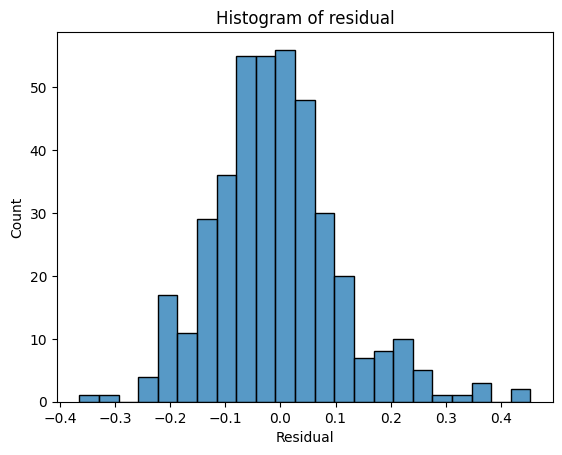

In [ ]:
sns.histplot(errors)
plt.xlabel("Residual")
plt.title("Histogram of residual")

Through histogram graph it looks like it is giving the bell shaped appearance and looks like normal distribution lets confirm that

---



In [ ]:
#Shapiro Wilk test
import scipy.stats as stats
stats.shapiro(errors)

ShapiroResult(statistic=0.9725440740585327, pvalue=7.438707712026371e-07)

p-value is less that 5% (0.05) thus we can reject the null hypothesis and confirm that it is a normal distribution

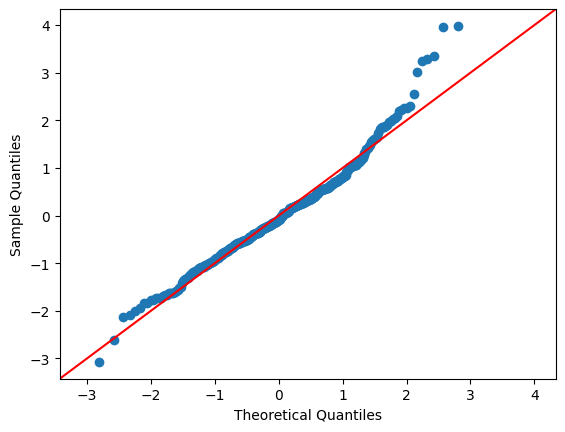

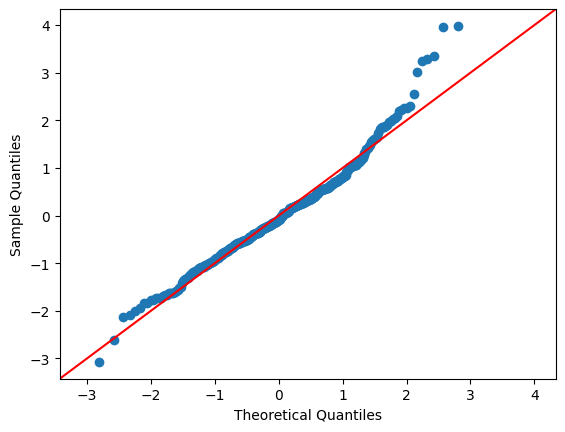

In [ ]:
# qq plot
sm.qqplot(errors, line='45', fit=True)

We can see the plot is aligning with the red line, almost a straight line hence we can confirm its a normal distribution

Text(0.5, 1.0, 'Predicted values VS Residuals')

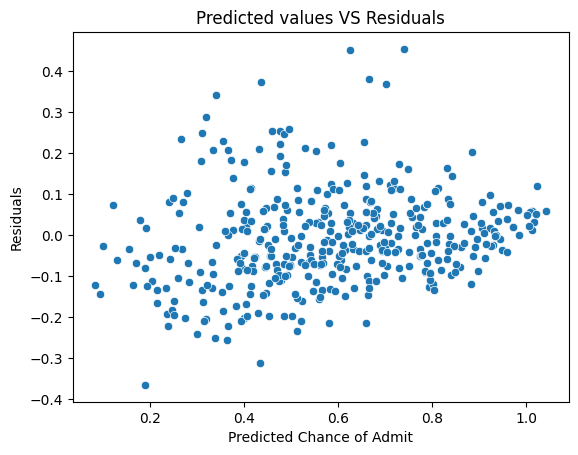

In [ ]:
# Lets check for heteroskedasticity

sns.scatterplot(x=y_hat, y=errors)
plt.xlabel("Predicted Chance of Admit")
plt.ylabel("Residuals")
plt.title("Predicted values VS Residuals")

We notice that as we go from left to right, error is not increasing hence we can conclude **Heteroskedasticity doesn't exist in our data**.


1. People with higher GRE Scores also have higher TOEFL Score?

<Axes: xlabel='GRE Score', ylabel='TOEFL Score'>

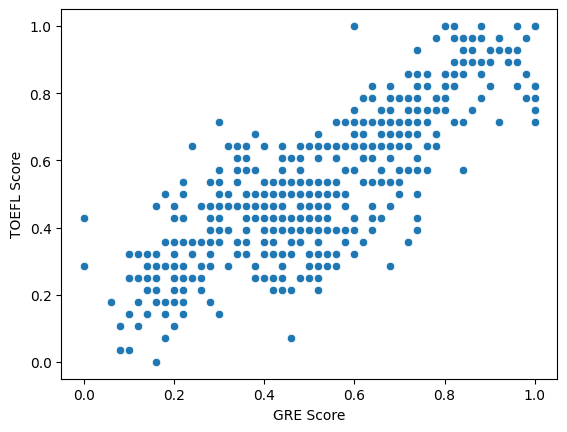

In [ ]:
sns.scatterplot(data=data, x='GRE Score', y='TOEFL Score')

Its clearly visible that there is linear relationship between these two and one who has higher GRE Score mostly has high TOEFL Score

 A student with a higher CGPA has a good LOR ?

<Axes: xlabel='CGPA', ylabel='LOR'>

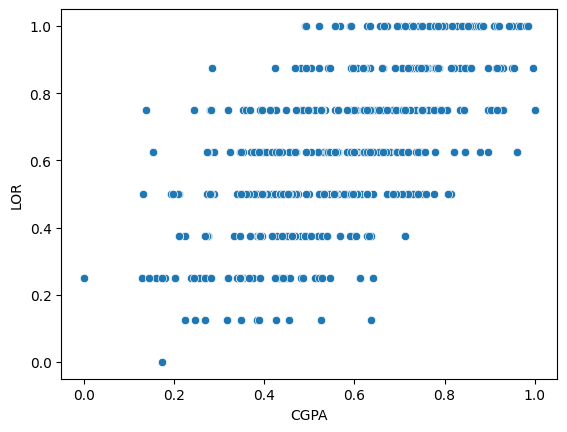

In [ ]:
sns.scatterplot(data=data, x='CGPA', y='LOR')

It is obvious from the graph that with higher CGPA we observe LOR value is higher

 Top 3 Correlated features with the Chance of Admit?  
   *   GRE Score
   *   TOEFL Score
   *   University Rating

The preditor variables are important when trying to estimate or extrapolate a future outcome based on information that is known. It is very important to have good predictor variables that really changes the chances of admit in the university. In the datasource we have GRE Score, TOEFL Score, University Rating, LOR, SOP, Research, CGPA which are the important factor which universities consider for admission.

We can also add the data w.r.t. 12th percentage and 10th percentage. Some of the colleges also prefer to compare the high school and board percentage. Also, to get edge over other students, a lot of students add community services which they have so if we can add that too the dataset.

A good model w.r.t to this problem statement is very useful in real world there are a lot of consultation companies which help students to get admission on college outside the country and they charge for this service. If one of the consultant has better and improved model than others, they can help students to apply for the university which they have good chances to get admitted this will decrease the number of universities they will be targetting and will also save students money by filling up the application form for the universities where they have good chances. Also, with these data they can guide students on the path which can help them to get into university with better ratings.